[View in Colaboratory](https://colab.research.google.com/github/sameera24/MLCC/blob/master/Exploratory_Data_Analysis.ipynb)

# Data Analysis Process

Data Analysis is very important before you can even begin solving ML problem. You have to first find what you data has, and what can you find from that data. You have to learn to ask questions and explore. It can be divided into following steps:

**Step 1: Ask questions**

Either you're given data and ask questions based on it, or you ask questions first and gather data based on that later. In both cases, great questions help you focus on relevant parts of your data and direct your analysis towards meaningful insights.

**Step 2: Wrangle data**

You get the data you need in a form you can work with in three steps: gather, assess, clean. You gather the data you need to answer your questions, assess your data to identify any problems in your data’s quality or structure, and clean your data by modifying, replacing, or removing data to ensure that your dataset is of the highest quality and as well-structured as possible.

**Step 3: Perform EDA (Exploratory Data Analysis)**

You explore and then augment your data to maximize the potential of your analyses, visualizations, and models. Exploring involves finding patterns in your data, visualizing relationships in your data, and building intuition about what you’re working with. After exploring, you can do things like remove outliers and create better features from your data, also known as feature engineering.

**Step 4: Draw conclusions (or even make predictions)**

This step is typically approached with machine learning or inferential statistics that are beyond the scope of this course, which will focus on drawing conclusions with descriptive statistics.

**Step 5: Communicate your results**

You often need to justify and convey meaning in the insights you’ve found. Or, if your end goal is to build a system, you usually need to share what you’ve built, explain how you reached design decisions, and report how well it performs. There are many ways to communicate your results: reports, slide decks, blog posts, emails, presentations, or even conversations. Data visualization will always be very valuable.

**Examples**
* [Facebook's blog post](https://research.fb.com/exposure-to-diverse-information-on-facebook-2/) and paper on exposure to ideologically diverse information
* [Article](http://www.dezyre.com/article/how-big-data-analysis-helped-increase-walmart-s-sales-turnover/109) on how Walmart used big data analysis to increase sales
* [Numerate's post](http://www.numerate.com/numerates-ranking-technology-pharmaceutical-rd-gains-u-s-patent/) on using data analysis to design pharmaceutical drugs



# Analysing Breast Cancer Data

The data can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). 
Let us load the data up. You can see that the [data file](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data) does not contain any header information. It contains a difficult to understand [documentation of names](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) instead. We can load the csv without header using header=None option in read_csv and then assign df.columns = list of column names, but I have given you the file.

Let us read the csv and add column names to it

In [0]:
import pandas as pd
df = pd.read_csv("https://piazza.com/class_profile/get_resource/jm8mdtr0laj6jv/jmho1w6j3t3cg")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


![alt text](https://piazza.com/class_profile/get_resource/jm8mdtr0laj6jv/jmhn5t0gt355rq)



In [0]:
# print the column labels in the dataframe
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave_points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_SE
13 texture_SE
14 perimeter_SE
15 area_SE
16 smoothness_SE
17 compactness_SE
18 concavity_SE
19 concave_points_SE
20 symmetry_SE
21 fractal_dimension_SE
22 radius_max
23 texture_max
24 perimeter_max
25 area_max
26 smoothness_max
27 compactness_max
28 concavity_max
29 concave_points_max
30 symmetry_max
31 fractal_dimension_max


## Asking Questions

What kind of questions you think we can ask from this data



*   An important thing to learn from this data is can we predict from features if the tumor is benign or malignant.
*   What features can we use to predict that? Will mean area makes a good guess?
*   Anything else you can think of?



## Assessing and Building Intuition
Once you have your data loaded into dataframes, Pandas makes a quick investigation of the data really easy. Let's explore some helpful methods for assessing and building intuition about a dataset. We can use the cancer data from before to help us.

In [0]:
# this returns a tuple of the dimensions of the dataframe
df.shape

(569, 32)

In [0]:
# this returns the datatypes of the columns
df.dtypes

id                          int64
diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
radius_SE                 float64
texture_SE                float64
perimeter_SE              float64
area_SE                   float64
smoothness_SE             float64
compactness_SE            float64
concavity_SE              float64
concave_points_SE         float64
symmetry_SE               float64
fractal_dimension_SE      float64
radius_max                float64
texture_max               float64
perimeter_max             float64
area_max                  float64
smoothness_max            float64
compactness_max           float64
concavity_max             float64
concave_points

In [0]:
# although the datatype for diagnosis appears to be object, further
# investigation shows it's a string
type(df['diagnosis'][0])

str

Pandas actually stores [pointers](https://en.wikipedia.org/wiki/Pointer_(computer_programming) to strings in dataframes and series, which is why `object` instead of `str` appears as the datatype. Understanding this is not essential for data analysis - just know that strings will appear as objects in Pandas.

In [0]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                        569 non-null int64
diagnosis                 569 non-null object
radius_mean               569 non-null float64
texture_mean              548 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           521 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave_points_mean       569 non-null float64
symmetry_mean             504 non-null float64
fractal_dimension_mean    569 non-null float64
radius_SE                 569 non-null float64
texture_SE                548 non-null float64
perimeter_SE              569 non-null float64
area_SE                   569 non-null float64
smoothness_SE             521 non-null float64
compactness_SE            569 non-null float64
concavity_SE              569 non-null float64
conca

In [0]:
# this returns the number of unique values in each column
df.nunique()

id                        562
diagnosis                   2
radius_mean               451
texture_mean              459
perimeter_mean            516
area_mean                 532
smoothness_mean           434
compactness_mean          530
concavity_mean            530
concave_points_mean       536
symmetry_mean             394
fractal_dimension_mean    494
radius_SE                 535
texture_SE                499
perimeter_SE              526
area_SE                   523
smoothness_SE             495
compactness_SE            534
concavity_SE              526
concave_points_SE         500
symmetry_SE               438
fractal_dimension_SE      539
radius_max                452
texture_max               490
perimeter_max             510
area_max                  537
smoothness_max            378
compactness_max           523
concavity_max             532
concave_points_max        485
symmetry_max              449
fractal_dimension_max     530
dtype: int64

In [0]:
# let us see unique values in diagnosis using unique function
df['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [0]:
# this returns useful descriptive statistics for each column of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Indexing and Selecting Data in Pandas

Let's separate this dataframe into three new dataframes - one for each metric (mean, standard error, and maximum). To get the data for each dataframe, we need to select the id and diagnosis columns, as well as the ten columns for that metric.

In [0]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 diagnosis
2 radius_mean
3 texture_mean
4 perimeter_mean
5 area_mean
6 smoothness_mean
7 compactness_mean
8 concavity_mean
9 concave_points_mean
10 symmetry_mean
11 fractal_dimension_mean
12 radius_SE
13 texture_SE
14 perimeter_SE
15 area_SE
16 smoothness_SE
17 compactness_SE
18 concavity_SE
19 concave_points_SE
20 symmetry_SE
21 fractal_dimension_SE
22 radius_max
23 texture_max
24 perimeter_max
25 area_max
26 smoothness_max
27 compactness_max
28 concavity_max
29 concave_points_max
30 symmetry_max
31 fractal_dimension_max


In [0]:
# select all the columns from 'id' to the last mean column
df_means = df.loc[:,'id':'fractal_dimension_mean']
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [0]:
# repeat the step above using index numbers
df_means = df.iloc[:,:11]
df_means.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [0]:
df_means.to_csv('cancer_data_means.csv', index=False)

### Selecting Multiple Ranges in Pandas

Selecting the columns for the mean dataframe was pretty straightforward - the columns we needed to select were all together (id, diagnosis, and the mean columns). Now we run into a little issue when we try to do the same for the standard errors or maximum values. id and diagnosis are separated from the rest of the columns we need! We can't specify all of these in one range.

Use this [stackoverflow link](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe) to learn how to select multiple ranges in Pandas and try it below. 


In [0]:
# import
import numpy as np

# create the standard errors dataframe. We are selecting first 2 columns and columns 12 through 21
# the numpy r_ is range concat object that does it for us
df_SE = df.iloc[:, np.r_[:2, 12:22]]

# view the first few rows to confirm this was successful
df_SE.head()

,id,diagnosis,radius_SE,texture_SE,perimeter_SE,area_SE,smoothness_SE,compactness_SE,concavity_SE,concave_points_SE,symmetry_SE,fractal_dimension_SE
0,842302,M,1.0950,NaN,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,0.4956,1.1560,3.445,27.23,NaN,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


## Cleaning Data
Let's first practice handling missing values and duplicate data with cancer_data_means.csv. we created earlier


In [0]:
df = pd.read_csv('cancer_data_means.csv')

# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
id                     569 non-null int64
diagnosis              569 non-null object
radius_mean            569 non-null float64
texture_mean           548 non-null float64
perimeter_mean         569 non-null float64
area_mean              569 non-null float64
smoothness_mean        521 non-null float64
compactness_mean       569 non-null float64
concavity_mean         569 non-null float64
concave_points_mean    569 non-null float64
symmetry_mean          504 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 49.0+ KB


In [0]:
# let us find how many rows have missing data
# the isnull function converts each value to Tru is null and False is not null
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# using any method we can find all columns that may have missing data
df.isnull().any()

id                     False
diagnosis              False
radius_mean            False
texture_mean            True
perimeter_mean         False
area_mean              False
smoothness_mean         True
compactness_mean       False
concavity_mean         False
concave_points_mean    False
symmetry_mean           True
dtype: bool

In [0]:
# we can pass axis attribute to find rows instead, axis = 0 for column ans 1 for row
df.isnull().any(axis=1)

0       True
1      False
2      False
3       True
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15      True
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29      True
       ...  
539    False
540    False
541    False
542    False
543     True
544    False
545    False
546    False
547    False
548    False
549    False
550     True
551    False
552    False
553    False
554    False
555     True
556    False
557    False
558    False
559    False
560    False
561    False
562     True
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [0]:
# we can use this as a mask to find rows that are null
df[df.isnull().any(axis=1)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean
0,842302,M,17.990,NaN,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419
3,84348301,M,11.420,20.38,77.58,386.1,NaN,0.28390,0.241400,0.105200,0.2597
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,NaN
13,846381,M,15.850,NaN,103.70,782.7,0.08401,0.10020,0.099380,0.053640,0.1847
15,84799002,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,NaN
17,84862001,M,16.130,NaN,108.10,798.8,0.11700,0.20220,0.172200,0.102800,0.2164
25,852631,M,17.140,16.40,116.00,912.7,NaN,0.22760,0.222900,0.140100,0.3040
29,853201,M,17.570,15.05,115.00,955.1,NaN,0.11570,0.098750,0.079530,0.1739
30,853401,M,18.630,25.11,124.80,1088.0,NaN,0.18870,0.231900,0.124400,0.2183
32,85382601,M,17.020,NaN,112.80,899.3,0.11970,0.14960,0.241700,0.120300,0.2248


In [0]:
# next we can see its shape to find huw many are missing
# we can use this as a mask to find rows that are null. it shows 127 rows have missing data
df[df.isnull().any(axis=1)].shape

(127, 11)

In [0]:
# use means to fill in missing values. However in this dataset there are no NA values
df.fillna(df.mean(), inplace=True)

# confirm your correction with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
id                     569 non-null int64
diagnosis              569 non-null object
radius_mean            569 non-null float64
texture_mean           569 non-null float64
perimeter_mean         569 non-null float64
area_mean              569 non-null float64
smoothness_mean        569 non-null float64
compactness_mean       569 non-null float64
concavity_mean         569 non-null float64
concave_points_mean    569 non-null float64
symmetry_mean          569 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 49.0+ KB


In [0]:
# check for duplicates in the data
sum(df.duplicated())

5

In [0]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [0]:
# confirm correction by rechecking for duplicates in the data
sum(df.duplicated())

0

### Renaming Columns
Since we also previously changed our dataset to only include means of tumor features, the "_mean" at the end of each feature seems unnecessary. It just takes extra time to type in our analysis later. Let's come up with a list of new labels to assign to our columns.

In [0]:
# remove "_mean" from column names
new_labels = []
for col in df.columns:
    if '_mean' in col:
        new_labels.append(col[:-5])  # exclude last 6 characters
    else:
        new_labels.append(col)

# new labels for our columns
new_labels

['id',
 'diagnosis',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave_points',
 'symmetry']

In [0]:
# assign new labels to columns in dataframe
df.columns = new_labels

# display first few rows of dataframe to confirm changes
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809


In [0]:
# save this for later
df.to_csv('cancer_data_edited.csv', index=False)

## Plotting with Pandas
Here are some of the most common and useful plots you can create with Pandas. Note that the plot methods on a Series or DataFrame are just simple wrappers around matplotlib functions. This is why you might see these them used interchangeably. Pandas is nice for quick insights, but you'll need to use matplotlib to really dive into details and customize your visualizations. We'll get into this more later on.

Let's first use the cancer data to practice plotting histograms, bar charts, and pie charts.

In [0]:
import pandas as pd
# This allows us to view visualizations in Jupyter notebook - useful!!
% matplotlib inline
# load the previously saved csv
df_cancer = pd.read_csv('cancer_data_edited.csv')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 11 columns):
id                564 non-null int64
diagnosis         564 non-null object
radius            564 non-null float64
texture           564 non-null float64
perimeter         564 non-null float64
area              564 non-null float64
smoothness        564 non-null float64
compactness       564 non-null float64
concavity         564 non-null float64
concave_points    564 non-null float64
symmetry          564 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 48.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f337b755470>,
      dtype=object)

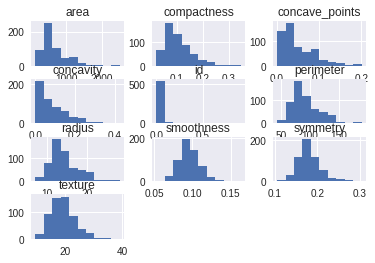

In [0]:
# This is quick way to view histograms for all numeric columns
df_cancer.hist()

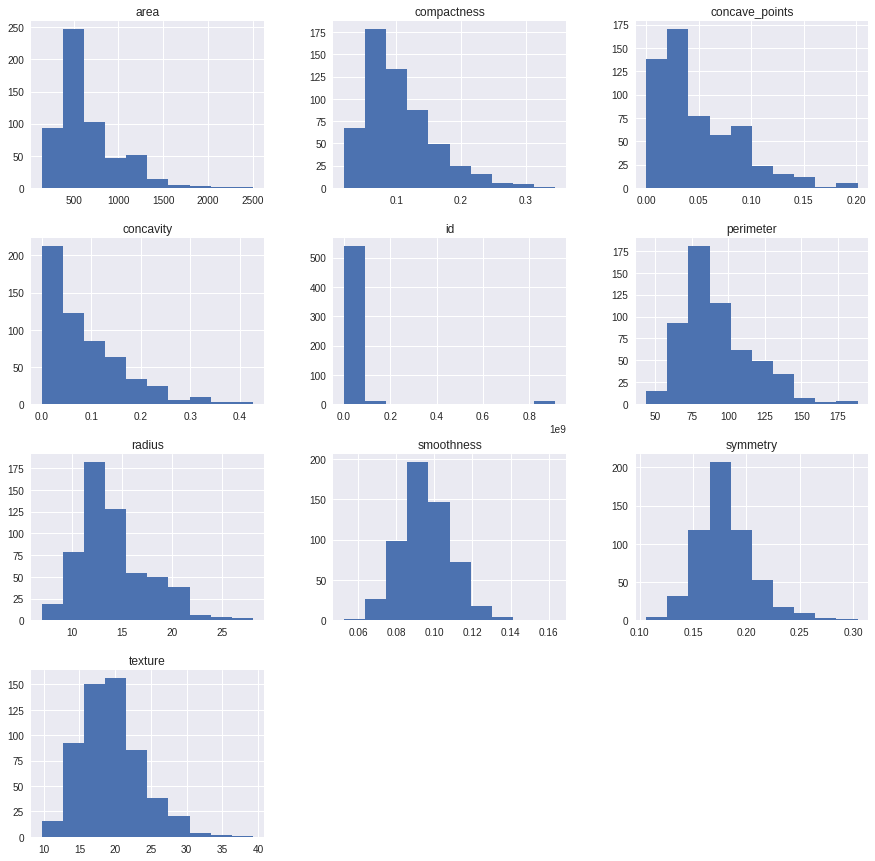

In [0]:
# That was way too crowded, let's make our figure size bigger
# Also, we can use a semicolon to suppress unwanted output
df_cancer.hist(figsize=(15,15));

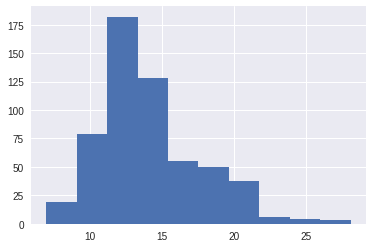

In [0]:
# We can also get a histogram for a single column like this
df_cancer['radius'].hist();

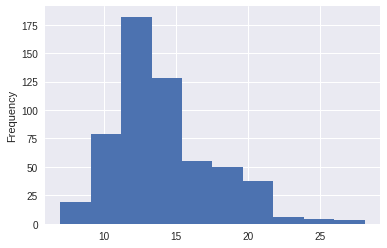

In [0]:
# We can also plot a histogram using this more general function
df_cancer['radius'].plot(kind='hist');

Next, let's plot a bar chart. For this, we need counts for each distinct value (or bar).

In [0]:
# This function aggregates counts for each unique value in a column
# note we create bar chart for categorical data. from info we see that diagnosis is not numerical
df_cancer['diagnosis'].value_counts()

B    354
M    210
Name: diagnosis, dtype: int64

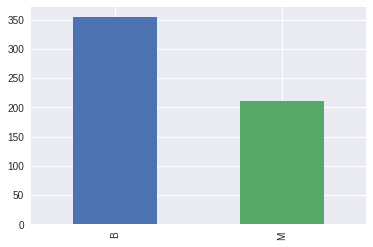

In [0]:
# We can use value counts to plot our bar chart
df_cancer['diagnosis'].value_counts().plot(kind='bar');

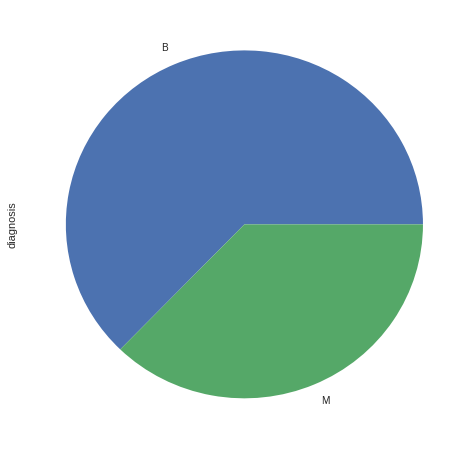

In [0]:
# Value counts are also required for pie charts
df_cancer['diagnosis'].value_counts().plot(kind='pie', figsize=(8,8));

Now, let's use cancer data to practice plotting scatter plots and box plots. This next function is really cool for getting quick insight into the relationships among numeric variables with scatterplots. It also displays a histogram for each variable. 

Notice how easy it becomes to see correlation between featues

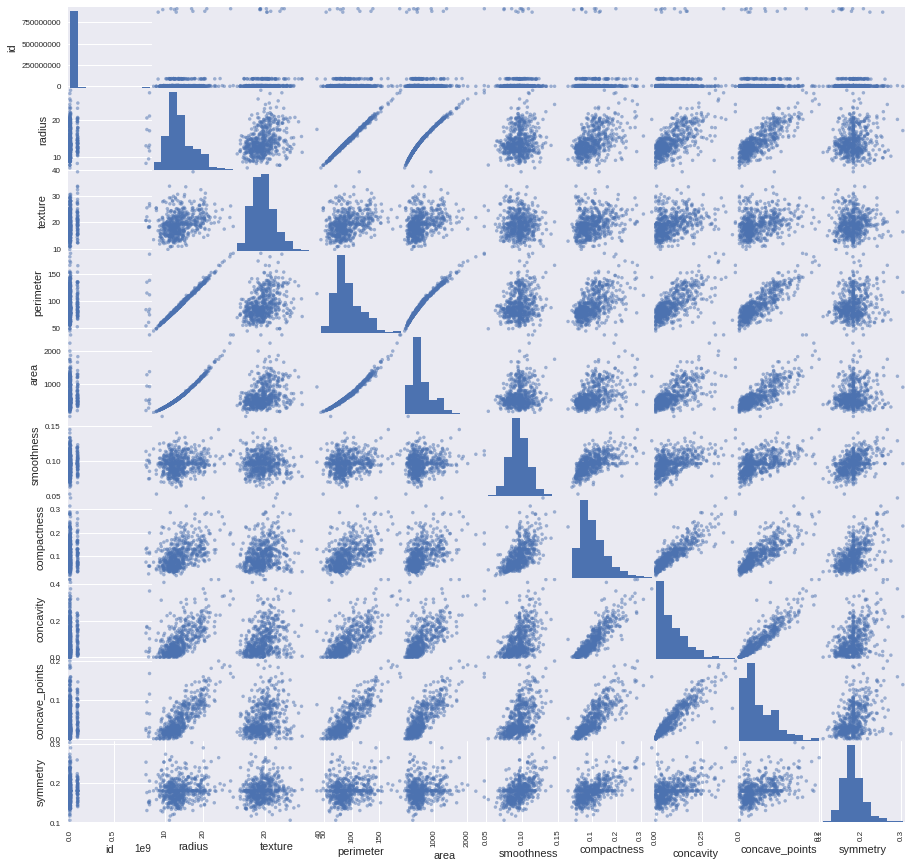

In [0]:
# Create scatter matrix, make figure size big enough to display clearly
pd.plotting.scatter_matrix(df_cancer, figsize=(15, 15));

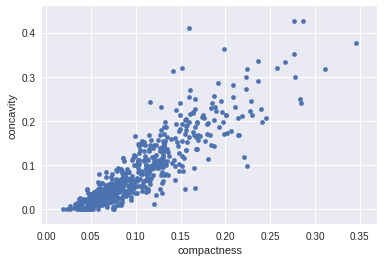

In [0]:
# Create a single scatter plot like this
df_cancer.plot(x='compactness', y='concavity', kind='scatter');

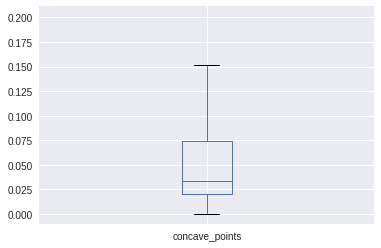

In [0]:
# Create a box plot like this
df_cancer['concave_points'].plot(kind='box');

## Drawing Conclusions
Let's address a question we posed with this cancer data earlier in the lesson - does the size of a tumor affect its malignancy? We can use descriptive statistics and visualizations to help us.

### Selecting Data with Masks

In order to do this analysis, we'd ideally compare sizes of tumors that are benign and malignant. We can use __masks__ to select all rows in the dataframe that were diagnosed as malignant.

In [0]:
# Create new dataframe with only malignant tumors
df_m = df_cancer[df_cancer['diagnosis'] == 'M']
df_m.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.3001,0.14710,0.2419
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.0869,0.07017,0.1812
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.1974,0.12790,0.2069
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.2414,0.10520,0.2597
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.1980,0.10430,0.1809


Let's break down how we got `df_m`.

`df['diagnosis'] == 'M'` returns a Pandas Series of booleans indicating whether the value in the `diagnosis` columns is equal to `M`.


In [0]:
mask = df['diagnosis'] == 'M'
print(mask)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19     False
20     False
21     False
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
538    False
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
559    False
560    False
561    False
562     True
563     True
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 564, dtype: bool


And indexing the dataframe with this mask will return all rows where the value in `mask` is True (ie. where `diagnosis == 'M'`).


In [0]:
df_m = df[mask]
df_m

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry
0,842302,M,17.99,19.293431,122.80,1001.0,0.118400,0.27760,0.30010,0.14710,0.241900
1,842517,M,20.57,17.770000,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.181200
2,84300903,M,19.69,21.250000,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.206900
3,84348301,M,11.42,20.380000,77.58,386.1,0.096087,0.28390,0.24140,0.10520,0.259700
4,84358402,M,20.29,14.340000,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.180900
5,843786,M,12.45,15.700000,82.57,477.1,0.127800,0.17000,0.15780,0.08089,0.208700
6,844359,M,18.25,19.980000,119.60,1040.0,0.094630,0.10900,0.11270,0.07400,0.181091
7,84458202,M,13.71,20.830000,90.20,577.9,0.118900,0.16450,0.09366,0.05985,0.219600
8,844981,M,13.00,21.820000,87.50,519.8,0.127300,0.19320,0.18590,0.09353,0.235000
9,84501001,M,12.46,24.040000,83.97,475.9,0.118600,0.23960,0.22730,0.08543,0.203000


Now that we have all the malignant tumors together in a dataframe, let's see summary statistics about the `area` feature, which offers a good metric for size.

In [0]:
# Display summary statistics for area of malignant tumors
df_m['area'].describe()

count     210.000000
mean      976.582857
std       365.494289
min       361.600000
25%       706.850000
50%       932.000000
75%      1200.750000
max      2501.000000
Name: area, dtype: float64

Let's do the same for all the benign tumors.

In [0]:
# Create new dataframe with only benign tumors
df_b = df[df['diagnosis'] == 'B']

# Display summary statistics for area of benign tumors
df_b['area'].describe()

count    354.000000
mean     462.712429
std      134.769158
min      143.500000
25%      374.975000
50%      458.150000
75%      551.550000
max      992.100000
Name: area, dtype: float64

In [0]:
print('The mean area of malignant tumors is {0:.4f} while that of benign \
tumors is {1:.4f}.'.format(df_m['area'].mean(), df_b['area'].mean()))

The mean area of malignant tumors is 976.5829 while that of benign tumors is 462.7124.


## Communicating Results

Although summary statistics like the mean are helpful, it would be nice to be able to compare the distributions of the areas of malignant and benign tumors visually. Let's see a simple example of using matplotlib to create histograms for both distributions on the same plot.

(We'll learn how to use matplotlib in the next lesson.)

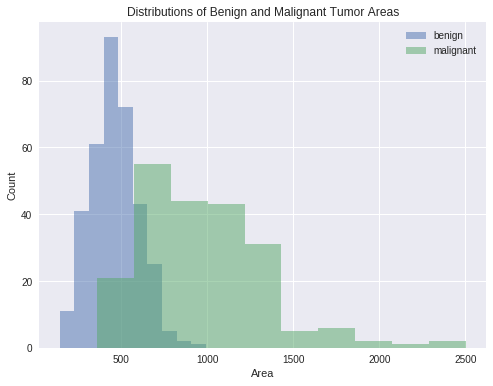

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

# Plot histogram of benign and malignant tumor areas on the same axes
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area'], alpha=0.5, label='benign')
ax.hist(df_m['area'], alpha=0.5, label='malignant')
ax.set_title('Distributions of Benign and Malignant Tumor Areas')
ax.set_xlabel('Area')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

The visual above suggests that there is a difference between the distribution of areas for benign and malignant tumors. We don't yet have the tools to conclude that these distributions are different or whether the size definitely affects a tumor's malignancy. However, we can observe from summary statistics and these histograms that malignant tumors are generally larger in size than benign tumors.

# Exercise

In this exercise we shall **dive deep** into Pandas, Numpy, and Matplotlib to analyze[ fuel economy](https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles) data ( [link here for data download](https://www.fueleconomy.gov/feg/download.shtml/)) for different car models from 2008 and 2018

Let us try to understand this data by reading the [description  document](https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf). For detailed description [download readme.txt](http://www.fueleconomy.gov/feg/epadata/Readme.txt)


Similar to read_csv Pandas has read_excel functionality as well. Let us load the 2018 and 2008 data [provided here.](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy)

In [0]:
!pip install -q xlrd #for old excel support
import pandas as pd

df2008 = pd.read_excel("https://www.fueleconomy.gov/feg/EPAGreenGuide/xls/all_alpha_08.xls")
df2018 = pd.read_excel("https://www.fueleconomy.gov/feg/EPAGreenGuide/xls/all_alpha_18.xlsx")

Now that you have loaded the datasets, Use pandas to explore these datasets in the Jupyter Notebook below to answer the quiz questions

* number of samples in each dataset
* number of columns in each dataset
* duplicate rows in each dataset
* datatypes of columns
* features with missing values
* number of non-null unique values for features in each dataset
* what those unique values are and counts for each

## Data Overview

Attempt the [first quiz](https://docs.google.com/forms/d/e/1FAIpQLSeRBcqIuSuPdgAWwR8RvuLso4CC5pCQeSZHWMa7u32YqvHVsg/viewform?usp=sf_link) by analyzing the loaded data



In [0]:
# your code here for first quiz

## Assessing Data

Attempt the [second quiz](https://docs.google.com/forms/d/e/1FAIpQLSfA5gqFgtny9MC4utKdglWoFDMR016wLrAI9zr3UH26hmSJkg/viewform?usp=sf_link) by analyzing the loaded data

In [0]:
# your code here for second quiz


## Cleaning Column Labels

1. **Drop extraneous columns**: Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function. you can use drop function.

> Columns to Drop:
* From 2008 dataset: `'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'`
* From 2018 dataset: `'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'`

2. **Rename Columns**: Rename columns to same name which carry the same meaning.

> Columns to rename
* Change the `"Sales Area"` column label in the 2008 dataset to `"Cert Region"` for consistency.
* Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use `df.column_name` instead of `df['column_name']` to select columns or use `query()`. Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [0]:
# your code here


In [0]:
#@title Sample Solution for dropping undesired columns
# drop columns fron 2008 dataset
df2008.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# your code here to drop from 2018 dataset the required columns
df2018.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

In [0]:
#@title Sample Solution for renaming columns
# rename columns
df2008.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)
# confirm changes
df2008.head(1)

In [0]:
#@title Sample solution to rename underscores
# replace spaces with underscores and lowercase labels for 2008 dataset
df2008.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
# confirm changes
df2008.head(1)

# repeat similar for 2018 data
df2018.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm column labels for 2008 and 2018 datasets are identical
df2008.columns == df2018.columns

In [0]:
# make sure they're all identical like this
(df2008.columns == df2018.columns).all()

In [0]:
# save new datasets for next section
df2008.to_csv('data_08.csv', index=False)
df2018.to_csv('data_18.csv', index=False)

## Filter, Drop Nulls, Dedupe
1. **Filter**: For consistency, only compare cars certified by California standards. Filter both datasets using `query` to select only rows where `cert_region` is `CA`. Then, drop the `cert_region` columns, since it will no longer provide any useful information (we'll know every value is `'CA'`).

In [0]:
df2008.info()

In [0]:
#@title Solution to filtering datasets
# filter datasets for rows following California standards
df_08 = df2008.query('cert_region == "CA"')
df_18 = df2018.query('cert_region == "CA"')

# you can also use the loc accessor for this
#df_08 = df2008.loc[df2008['cert_region']=='CA']
#df_18 = df2018.loc[df2018['cert_region']=='CA']

In [0]:
# confirm only certification region is California
df_08['cert_region'].unique()

In [0]:
# confirm only certification region is California
df_18['cert_region'].unique()

In [0]:
# Remove cert_region column from both datasets as we only have CA data

In [0]:
#@title Solution to dropping cert_region column
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [0]:
df_08.shape

In [0]:
df_18.shape

2. **Drop Nulls**: Drop any rows in both datasets that contain missing values. 

In [0]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

In [0]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

In [0]:
# drop rows with any null values in both datasets


In [0]:
#@title Solution to dropping null value rows
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [0]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

In [0]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

3. **Dedupe**: Drop any duplicate rows in both datasets.

In [0]:
# print number of duplicates in 2008 and 2018 datasets
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

In [0]:
# remove duplicate rows from both datasets


In [0]:
#@title Solution to dropping duplicates
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [0]:
# print number of duplicates again to confirm dedupe - should both be 0
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())

0
0


In [0]:
# save progress for the next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

## Inspecting Data Types

Inspect the datatypes of features in each dataset and think about what changes should be made to make them practical and consistent (in both datasets). Use this to help you [answer the quiz questions here](https://docs.google.com/forms/d/e/1FAIpQLSeO1Z9VkeR9aDOES7lbqtqzZnGAJ6tsv30v1DGOzH7VzDqr9Q/viewform?usp=sf_link).


In [0]:
# your code here to inspect data types

## Fixing Data Types
Let us make the following changes to make the datatypes consistent and practical to work with.

###Fix cyl datatype
* 2008: extract int from string.
* 2018: convert float to int.

In [0]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

In [0]:
# check type of data stored
type(df_08['cyl'][0])

Read [this](https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas) to help you extract ints from strings in Pandas for the next step.

In [0]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

In [0]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

In [0]:
type(df_08['cyl'][0])

In [0]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [0]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

###Fix air_pollution_score datatype
* 2008: convert string to float.
* 2018: convert int to float.

In [0]:
# try using Pandas to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

**Figuring out the issue**

Looks like this isn't going to be as simple as converting the datatype. According to the error above, the value is "6/4" somewhere. Let us query that.

In [0]:
df_08.query('air_pollution_score == "6/4"')

**It's not just the air pollution score!**

The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to this link, which I found from the PDF documentation:

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each. This is a little tricky, so I'm going to show you how to do it with the 2008 dataset, and then you'll try it with the 2018 dataset.

In [0]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

Looks like this dataset only has one! The 2018 has MANY more - but don't worry - the steps I'm taking here will work for that as well!

In [0]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [0]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

For this next part, we're going use Pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [0]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    

In [0]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

In [0]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

In [0]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

In [0]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [0]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

In [0]:
df_08.shape

**Repeat** this process for the 2018 dataset

In [0]:
# repeat the same process done above for 2018 data


In [0]:
#@title Solution for 2018 data
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [0]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

In [0]:
df_18.shape

**Now we can comfortably continue the changes needed for air_pollution_score! Here they are again:**
* 2008: convert string to float
* 2018: convert int to float

In [0]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)


In [0]:
#@title Solution for 2008 data
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [0]:
#@title Solution for 2018 data
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [0]:
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

###Fix city_mpg, hwy_mpg, cmb_mpg datatypes
* 2008 and 2018: convert string to float.

In [0]:
# convert mpg columns to floats
df_08.city_mpg = df_08.city_mpg.astype(float)
df_18.city_mpg = df_18.city_mpg.astype(float)
df_08.hwy_mpg = df_08.hwy_mpg.astype(float)
df_18.hwy_mpg = df_18.hwy_mpg.astype(float)
df_08.cmb_mpg = df_08.cmb_mpg.astype(float)
df_18.cmb_mpg = df_18.cmb_mpg.astype(float)

In [0]:
#@title Solution
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

### Fix greenhouse_gas_score datatype
* 2008: convert from float to int.

In [0]:
# convert 2008 greenhouse_gas_score from float to int
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(int)

In [0]:
#@title Solution
# convert 2008 greenhouse_gas_score from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

## Save the cleaned dataset in new dataframes

All the dataypes are now fixed! Take one last check to confirm all the changes.

In [0]:
df_08.dtypes

In [0]:
df_18.dtypes

In [0]:
df_08.dtypes == df_18.dtypes

In [0]:
# Save your new CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

## Exploring with Visuals
Use histograms and scatterplots to explore clean_08.csv and clean_18.csv in the Jupyter notebook. Then, [answer the quiz questions here](https://docs.google.com/forms/d/e/1FAIpQLSfaXb8T0T1lLFKv1q0R6tI8hLmwvQgD-044mskvGNzcgY97ww/viewform?usp=sf_link)


In [0]:
# Create scatter matrix, make figure size big enough to display clearly
# you can use scatter_matrix as used for cancer data or eve seaborn's pairplot


In [0]:
#@title Solution: scatter matrix for 2008 data
# Create scatter matrix, make figure size big enough to display clearly
pd.plotting.scatter_matrix(df_08, figsize=(15, 15));

In [0]:
#@title Solution: scatter matrix for 2018 data
# Create scatter matrix, make figure size big enough to display clearly
pd.plotting.scatter_matrix(df_18, figsize=(15, 15));

## Conclusions & Visuals
Draw conclusions and create visuals to communicate results below! Make sure to address the following questions.

* Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
* Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
* Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
* Q4: What features are associated with better fuel economy (mpg)?
* Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

> This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
df_08.head(1)

### Q1: Are more unique models using alternative sources of fuel? By how much?

Let's first look at what the sources of fuel are and which ones are alternative sources.

In [0]:
df_08.fuel.value_counts()

In [0]:
df_18.fuel.value_counts()

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [0]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

In [0]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

In [0]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [0]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

In [0]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

In [0]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [0]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

In [0]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

In [0]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

In [0]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets.

In [0]:
# smartway labels for 2008
df_08.smartway.unique()

In [0]:
# get all smartway vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [0]:
# explore smartway vehicles in 2008
smart_08.describe()

Use what you've learned so for to further explore this dataset on 2018 smartway vehicles.

In [0]:
# smartway labels for 2018
df_18.smartway.unique()

In [0]:
# get all smartway vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [0]:
smart_18.describe()

### Q4: What features are associated with better fuel economy?

You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [0]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

In [0]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

## Types of Merges
So far, we've learned about appending dataframes. Now we'll learn about Pandas Merges, a different way of combining dataframes. This is similar to the database-style "join." If you're familiar with SQL, this comparison with SQL may help you connect these two.

Here are the four types of merges in Pandas. Below, "key" refers to common columns in both dataframes that we're joining on.

* Inner Join - Use intersection of keys from both frames.
* Outer Join - Use union of keys from both frames.
* Left Join - Use keys from left frame only.
* Right Join - Use keys from right frame only.

Below are diagrams to visualize each type.
Read the documentation for Pandas Merges [here](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

![alt text](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59d3e866_inner-outer/inner-outer.png)
![alt text](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59d3e874_left-right/left-right.png)


##Merging Datasets
1. Rename 2008 columns to distinguish from 2018 columns after the merge

> To do this, use pandas' rename() with a lambda function. See example here. In the lambda function, take the first 10 characters of the column label and and concatenate it with `_2008`. (Only take the first 10 characters to prevent really long column names.)

> The lambda function should look something like this: `lambda x: x[:10] + "_2008"`

> In your rename, don't forget to specify the parameter `columns=` when you add the lambda function!

In [0]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [0]:
# view to check names
df_08.head()

2. Perform inner merge

> To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

> Perform an inner merge with the left on model_2008 and the right on model. See documentation for pandas' merge [here](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

In [0]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [0]:
# view to check merge
df_combined.head()

In [0]:
# SAVE
df_combined.to_csv('combined_dataset.csv', index=False)

## Results with Merged Dataset
Use the notebook below to answer the final question with the merged dataset.

###Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

Here are the steps for answering this question.

1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model
To do this, [group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) model and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [0]:
model_mpg = df_combined.groupby(['model'])['cmb_mpg_2008', 'cmb_mpg'].mean()
model_mpg

2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [0]:
# create a new column
model_mpg['mpg_change'] = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008

# we shall display the values in sorted order, max change first
model_mpg.sort_values(['mpg_change'], ascending=False)

3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [0]:
model_mpg.query('mpg_change == '+str(max(model_mpg.mpg_change)))

## We have made a mistake, can you figure that out?

We made a blunder. In essence we have somehow compared apples with oranges, can you find that out and tell us actually whcih model has the max improvement in fuel economy over the past decade?

In [0]:
df_18.query('model == "VOLVO XC 90"')

In [0]:
df_08.query('model_2008 == "VOLVO XC 90"')

In [0]:
model_mpg.query('model == "VOLVO XC 90"')

Above we find that we are averaging gasolene and electricity version, which is wrong. We should compare with same fuel type.

In [0]:
df_combined.query('model == "VOLVO XC 90"')

In [0]:
# let us remove comparisons of different fuel types
df_combined = df_combined[df_combined.fuel_2008==df_combined.fuel]

In [0]:
model_mpg = df_combined.groupby(['model', 'fuel'])['cmb_mpg_2008', 'cmb_mpg'].mean()
model_mpg

In [0]:
# create a new column
model_mpg['mpg_change'] = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008

# we shall display the values in sorted order, max change first
model_mpg.sort_values(['mpg_change'], ascending=False)

From here we can see that it is actually CHEVROLET Malibu that improved the fuel economy significantly

## Can you ask more questions. Show your mettle!!!



In [0]:
# your code below

#References

1. Udacity, [Intro to data analysis](https://classroom.udacity.com/courses/ud170) course.
1. Udacity, [Intro to data science](https://classroom.udacity.com/courses/ud170-india) course.